In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
data = pd.read_csv("kc_house_data.csv")

In [12]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine>

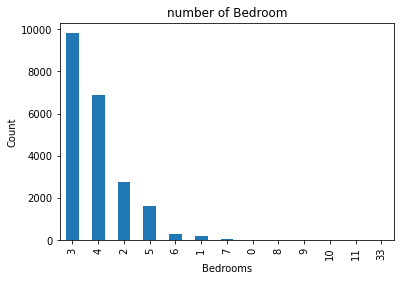

In [14]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('number of Bedroom')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

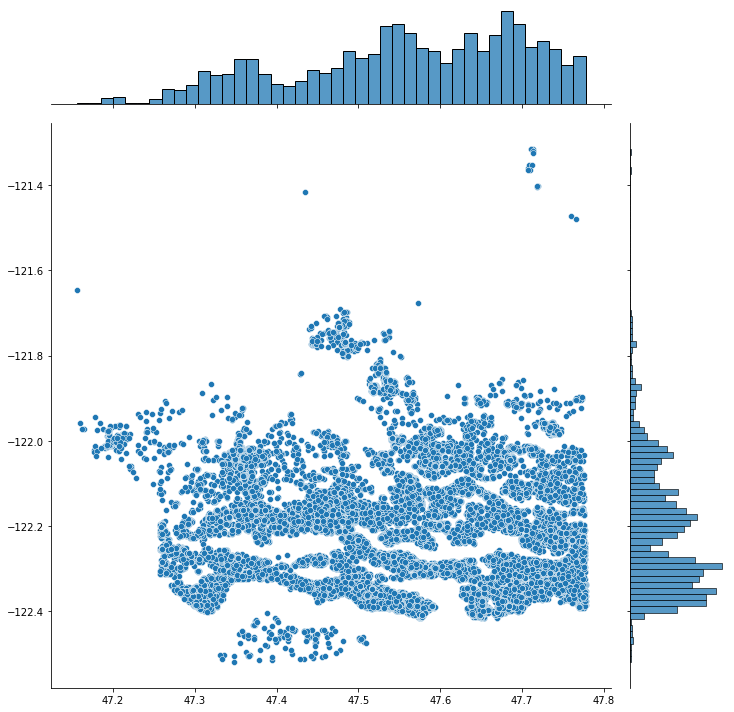

TypeError: ignored

In [15]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values, y=data.long.values, size=10)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
plt1 = plt()
sns.despine

Text(0.5, 1.0, 'Price vs Square Feet')

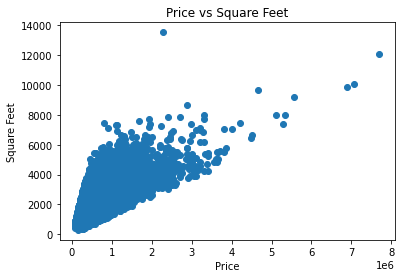

In [16]:
plt.scatter(data.price,data.sqft_living)
plt.xlabel("Price")
plt.ylabel('Square Feet')
plt.title("Price vs Square Feet")

Text(0.5, 1.0, 'Price vs Location of the area')

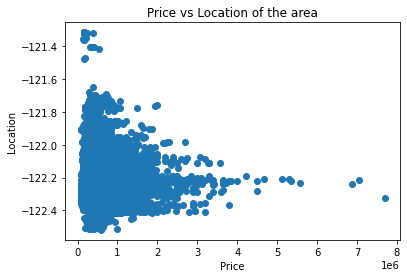

In [17]:
plt.scatter(data.price,data.long)
plt.xlabel("Price")
plt.ylabel('Location')
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

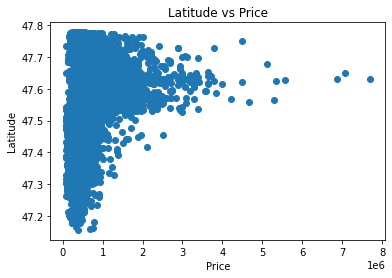

In [18]:
plt.scatter(data.price,data.lat)
plt.xlabel("Price")
plt.ylabel('Latitude')
plt.title("Latitude vs Price")

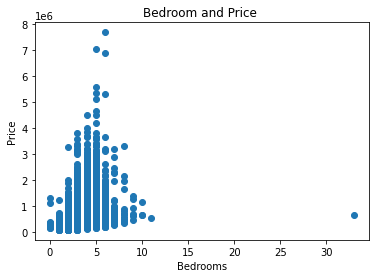

<function seaborn.utils.despine>

In [19]:
plt.scatter(data.bedrooms,data.price)
plt.title("Bedroom and Price ")
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.show()
sns.despine

Text(0.5, 1.0, 'Waterfront vs Price ( 0= no waterfront)')

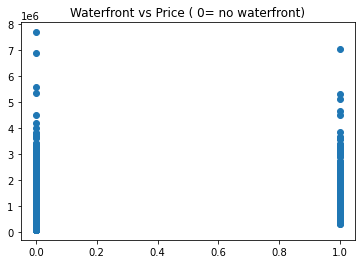

In [20]:
plt.scatter(data.waterfront,data.price)
plt.title("Waterfront vs Price ( 0= no waterfront)")

In [21]:
train1 = data.drop(['id', 'price'],axis=1)

In [22]:
train1.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


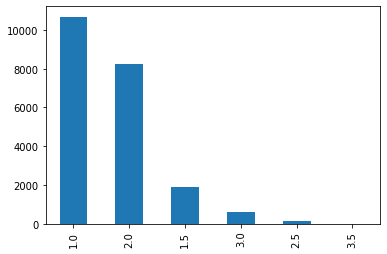

In [23]:
data.floors.value_counts().plot(kind='bar')

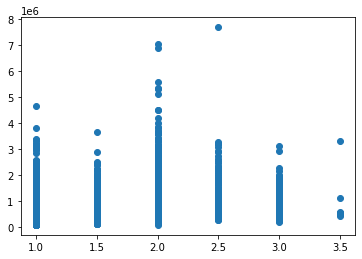

In [24]:
plt.scatter(data.floors,data.price)

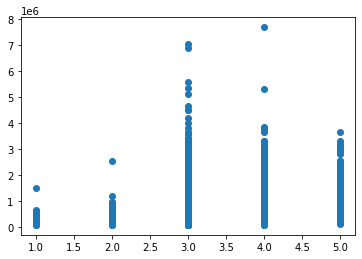

In [25]:
plt.scatter(data.condition,data.price)

Text(0.5, 1.0, 'Which is the pricey location by zipcode?')

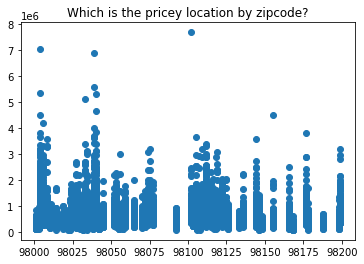

In [26]:
plt.scatter(data.zipcode,data.price)
plt.title("Which is the pricey location by zipcode?")

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
reg = LinearRegression()

In [29]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date ]
data['date'] = conv_dates
train1 = data.drop(['id', 'price'],axis=1)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state =2)

In [32]:
reg.fit(x_train,y_train)

LinearRegression()

In [33]:
reg.score(x_test,y_test)

0.7320342760357641

In [34]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
        learning_rate = 0.1, loss = 'ls')

In [35]:
clf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [36]:
clf.score(x_test,y_test)

0.9196448959250653